Data Types:
recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

Unique Categories:
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']

Unique High Traffic Values:
['High' nan]


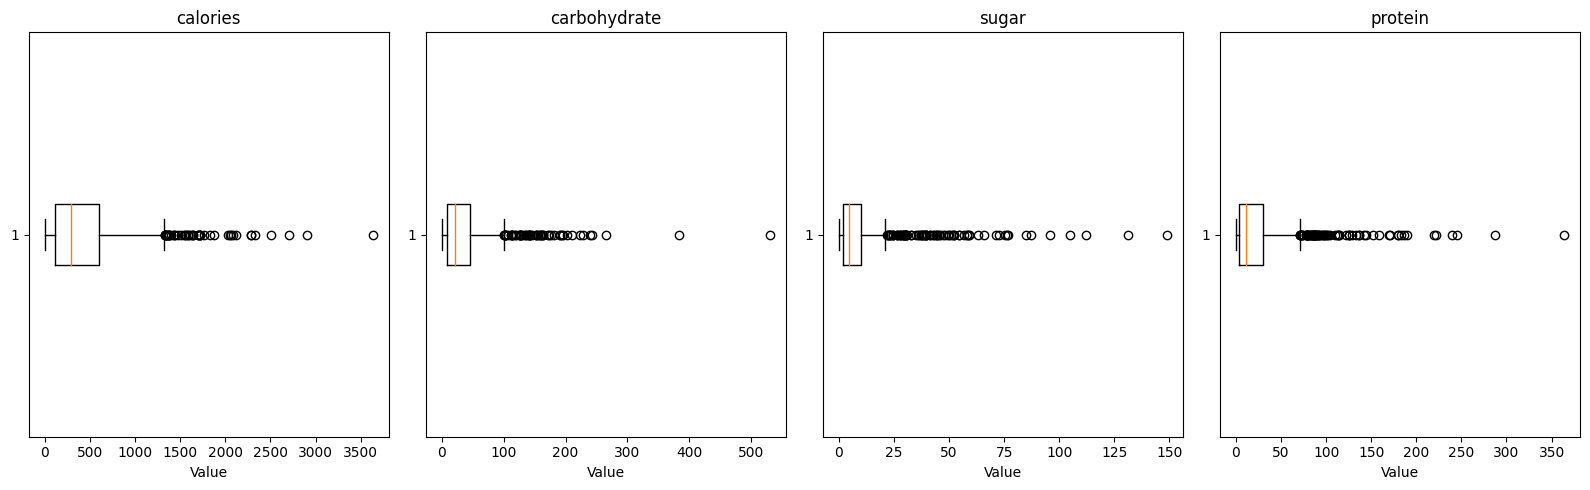

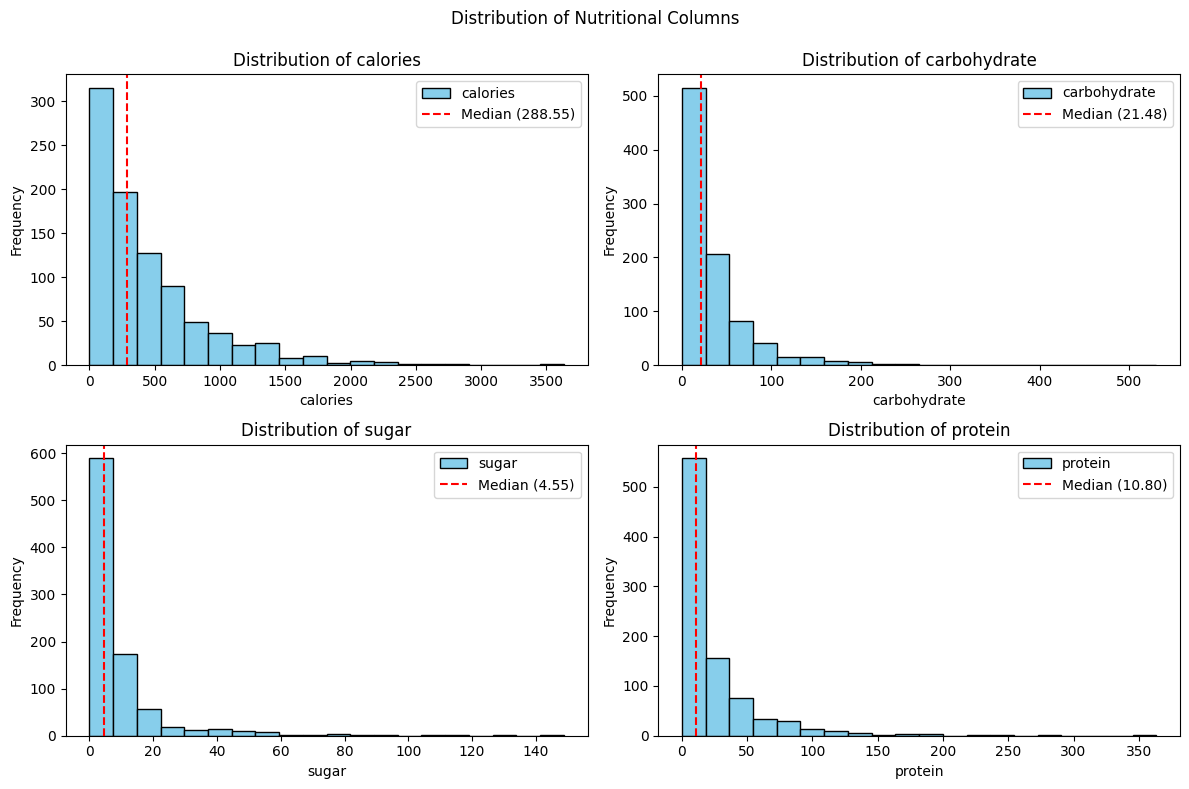

     recipe  calories  carbohydrate  ...      category  servings high_traffic
0         1    266.06         19.25  ...          Pork       6.0         High
1         2     35.48         38.56  ...        Potato       4.0         High
2         3    914.28         42.68  ...     Breakfast       1.0     Not High
3         4     97.03         30.56  ...     Beverages       4.0         High
4         5     27.05          1.85  ...     Beverages       4.0     Not High
..      ...       ...           ...  ...           ...       ...          ...
942     943   1161.00          5.31  ...  Lunch/Snacks       2.0     Not High
943     944    266.06         19.25  ...        Potato       2.0         High
944     945    951.74         29.42  ...          Pork       2.0         High
945     946    266.61         35.77  ...        Potato       6.0         High
946     947    184.56         45.21  ...     Beverages       4.0     Not High

[947 rows x 8 columns]
Missing values after imputation:
recipe 

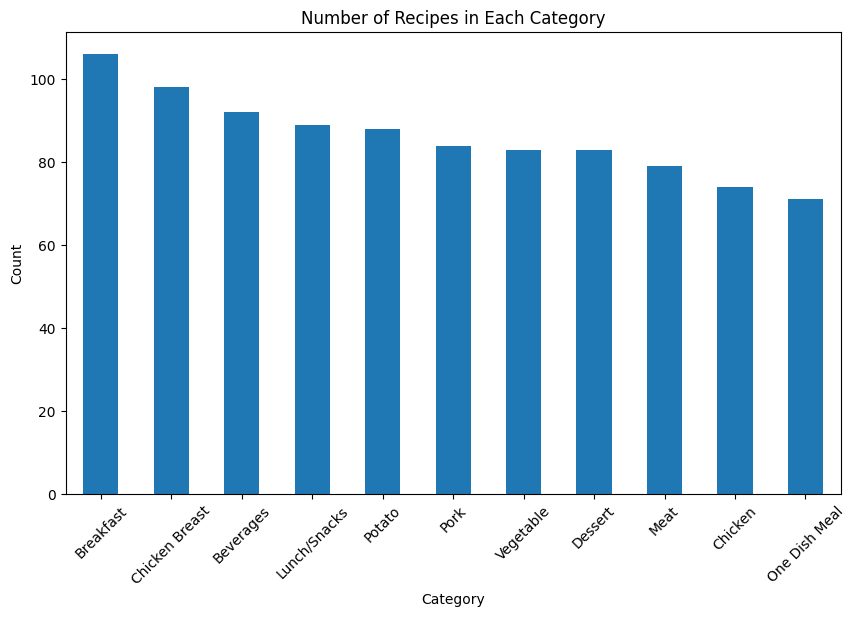

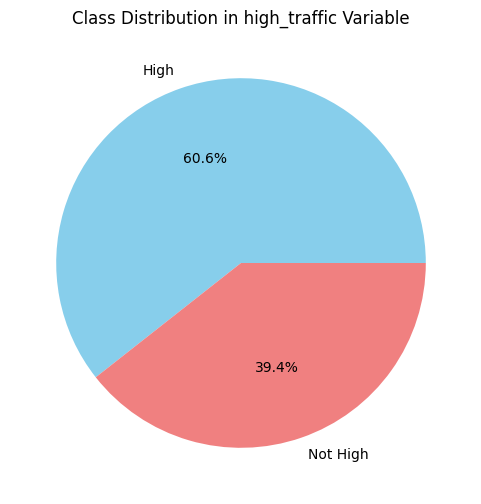

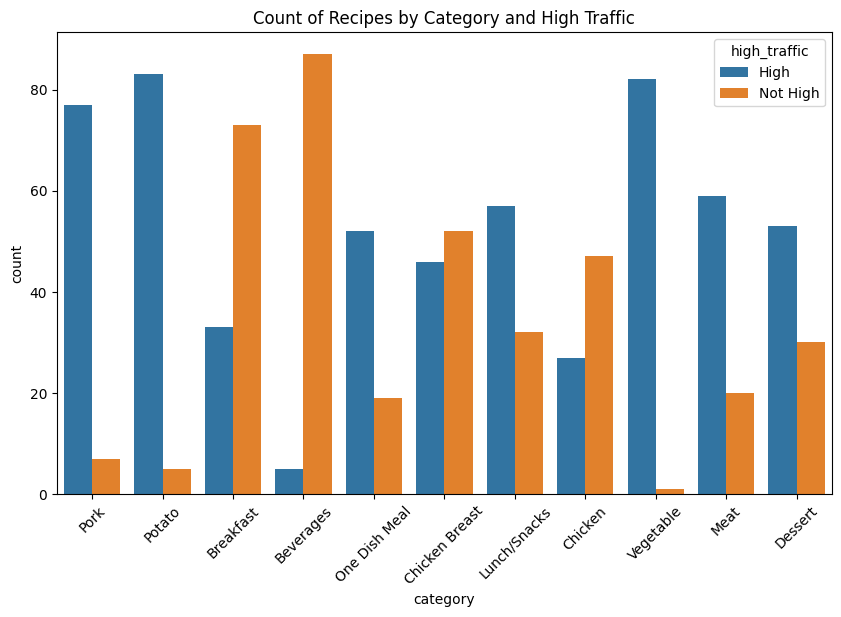

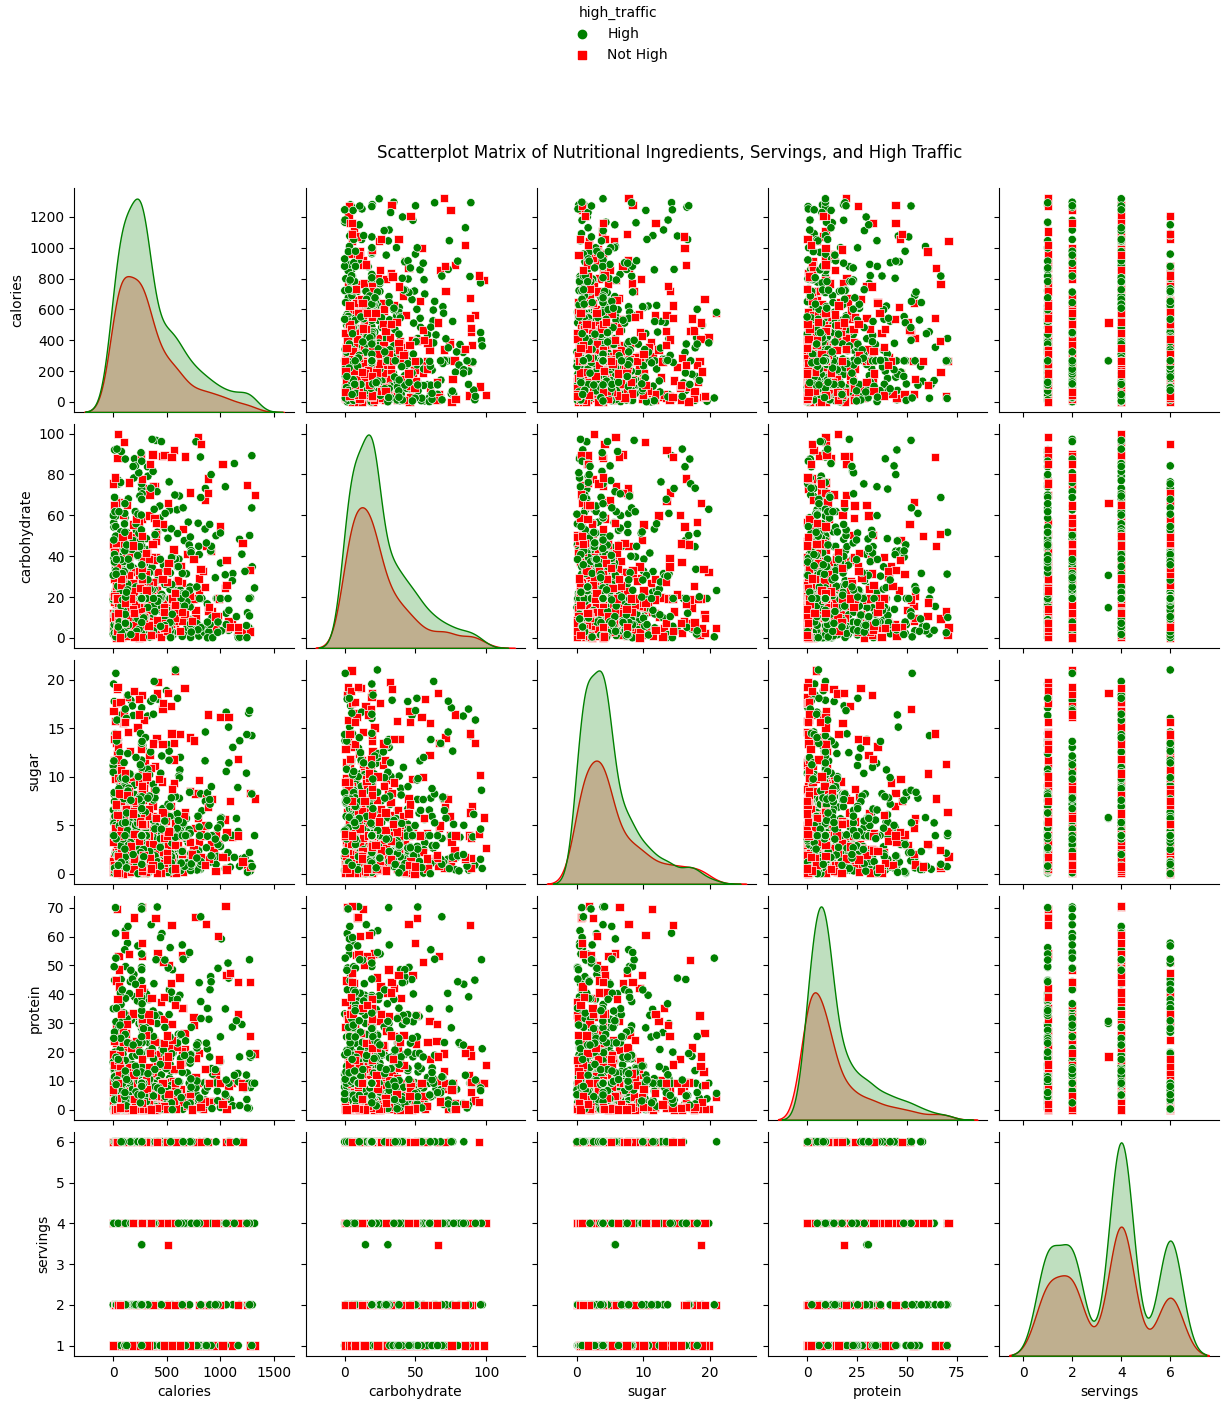

Accuracy: 0.6947368421052632
Confusion Matrix:
[[95 18]
 [40 37]]
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.84      0.77       113
    Not High       0.67      0.48      0.56        77

    accuracy                           0.69       190
   macro avg       0.69      0.66      0.66       190
weighted avg       0.69      0.69      0.68       190

Accuracy: 0.77
Confusion Matrix:
[[92 21]
 [23 54]]
Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.81      0.81       113
    Not High       0.72      0.70      0.71        77

    accuracy                           0.77       190
   macro avg       0.76      0.76      0.76       190
weighted avg       0.77      0.77      0.77       190



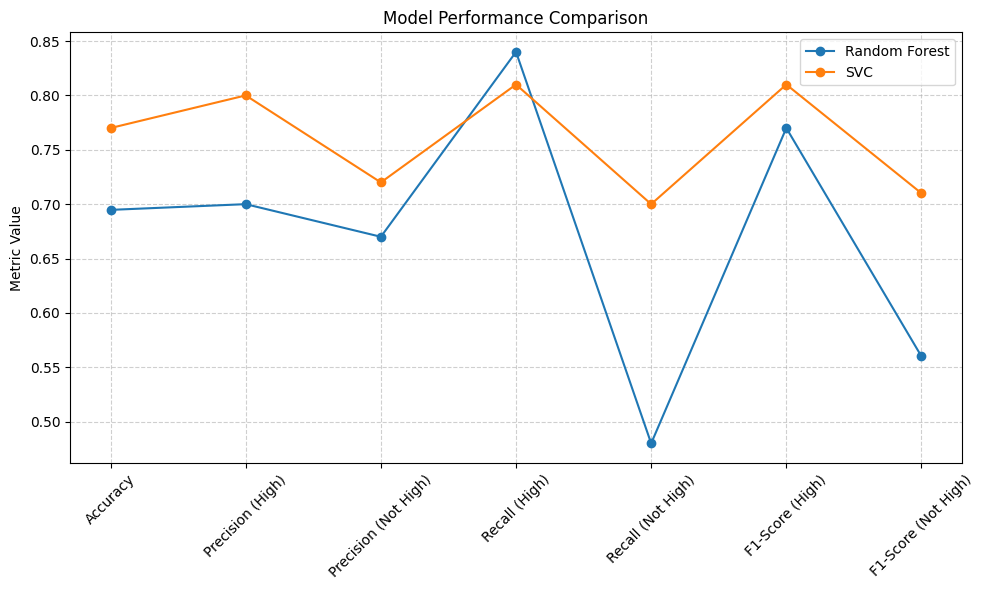

In [2]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
df = pd.read_csv("recipe_site_traffic_2212.csv")

# Data Validation

import pandas as pd

# Check data types of columns
data_types = df.dtypes
print("Data Types:")
print(data_types)

# Check unique values in the 'category' and 'high_traffic' columns
unique_categories = df['category'].unique()
print("\nUnique Categories:")
print(unique_categories)

unique_high_traffic = df['high_traffic'].unique()
print("\nUnique High Traffic Values:")
print(unique_high_traffic)

# Converting "servings" variable into numeric type.
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')

# Checking the missing values

df.isna().sum()

# Missing values display

# Define the columns with missing values
columns_with_missing = ["calories", "carbohydrate", "sugar", "protein"]

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_with_missing), figsize=(16, 5))

# Plot box plots for each column
for i, column in enumerate(columns_with_missing):
    ax = axes[i]
    ax.boxplot(df[column].dropna(), vert=False)
    ax.set_title(column)
    ax.set_xlabel('Value')

# Show the box plots
plt.tight_layout()
plt.show()

## Display of the distribution of the variables with missing values

import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Filter the columns of interest
columns_to_check = ["calories", "carbohydrate", "sugar", "protein"]

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Distribution of Nutritional Columns")

# Iterate through each column
for i, col in enumerate(columns_to_check):
    # Create a subplot for the current column
    ax = axes[i // 2, i % 2]
    
    # Plot a histogram to visualize the distribution
    df[col].plot(kind="hist", ax=ax, bins=20, color="skyblue", edgecolor="black")
    
    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {col}")
    
    # Add a vertical line for the median
    median = df[col].median()
    ax.axvline(median, color="red", linestyle="--", label=f"Median ({median:.2f})")
    
    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

## Filling "servings" variable´s NaN values with the average of it.

# Calculate the average value of the 'servings' column
average_servings = df["servings"].mean()

# Fill missing values in the 'servings' column with the average value
df["servings"].fillna(average_servings, inplace=True)


## Replacing missing values with median values of the variables (sugar, carbonhydrate, protein, calories)

# Define the columns with missing values
columns_with_missing = ["calories", "carbohydrate", "sugar", "protein"]

# Check for outliers and perform median imputation
for column in columns_with_missing:
    # Calculate the quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Replace outliers with NaN
    df.loc[outliers, column] = np.nan
    
    # Impute missing values with the median
    median = df[column].median()
    df[column].fillna(median, inplace=True)


## Filling NaN values with "Not High" in order to use it later.

df['high_traffic'].fillna('Not High', inplace=True)

# Check if missing values have been imputed
missing_values_after_imputation = df.isnull().sum()

# Print the updated DataFrame
print(df)

# Print the number of missing values after imputation
print("Missing values after imputation:")
print(missing_values_after_imputation)


### Explaratory Analysis


#number of recipes in each category 
import matplotlib.pyplot as plt

# Count the number of recipes in each category
category_counts = df['category'].value_counts()

# Create a bar plot for recipe categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Number of Recipes in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## To check if there is a class imbalance

# Count the number of samples in each class
class_counts = df['high_traffic'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution in high_traffic Variable')
plt.show()

## Graphics showing two or more variables.

plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='high_traffic', data=df)
plt.xticks(rotation=45)
plt.title('Count of Recipes by Category and High Traffic')
plt.show()



# Create a scatterplot matrix
scatterplot_data = df[['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'high_traffic']]
scatterplot = sns.pairplot(scatterplot_data, hue='high_traffic', markers=["o", "s"], palette={"High": "g", "Not High": "r"})

# Set the title
scatterplot.fig.suptitle('Scatterplot Matrix of Nutritional Ingredients, Servings, and High Traffic', y=1.02)

# Move the legend to the top
scatterplot._legend.set_bbox_to_anchor([0.5, 1.1])

# Show the plot
plt.show()

## Model 1 Random Forest Classifier (baseline model)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# 'high_traffic' is the target variable (1 for 'High' and 0 for 'Not High')

# Preprocess the data
categorical_cols = ['category']  # determined the categorical data
df1 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot encoding for categorical variables
df2 = df1.dropna()  # Remove rows with missing values if there is any.

# Split the data into features (X) and target (y)
X = df1.drop('high_traffic', axis=1)
y = df1['high_traffic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with class weights to handle imbalance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


##### Model 2 (SVC)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder



# Define features (X) and the target variable (y)
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']

# the 'category' is encoded
label_encoder = LabelEncoder()
X['category'] = label_encoder.fit_transform(X['category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Random Forest', 'SVC']

# Metrics
metrics = ['Accuracy', 'Precision (High)', 'Precision (Not High)', 'Recall (High)', 'Recall (Not High)', 'F1-Score (High)', 'F1-Score (Not High)']

# Performance values for each model
random_forest_values = [0.6947368421052632, 0.70, 0.67, 0.84, 0.48, 0.77, 0.56]
svc_values = [0.77, 0.80, 0.72, 0.81, 0.70, 0.81, 0.71]

# Number of metrics
num_metrics = len(metrics)

# Create an array of x-values for plotting (from 0 to the number of metrics)
x = np.arange(num_metrics)

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(x, random_forest_values, marker='o', label='Random Forest', linestyle='-')
plt.plot(x, svc_values, marker='o', label='SVC', linestyle='-')

# Set x-axis labels
plt.xticks(x, metrics, rotation=45)

# Set y-axis label
plt.ylabel('Metric Value')

# Set the title
plt.title('Model Performance Comparison')

# Add a legend
plt.legend()

# Show gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()









## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation